
# CS 122-02(47791): Advanced Programming with Python


# Final Exam (Written Test), Fall 2020 


* Read instructions marked xxx
* Fill in the missing codes indicated by xxx
* You could add helper funcitons, but never delete any portion of this documents.
* Restart Kernel & Run All before your submission to 
    * make sure your program does run throught without crash

* Grading:
    * full credit if the program output is exactly as expected
    * 0 credit if the program output is obviously incorrect
    * partial credit may be given at will if the program output is close to
      the expected.
      
* Note that you will get 0 credits for this test if 
    * your program does not compile 
    * Your program crashes at any point
    * you delete any texts or codes

# A:  8-puzzle

* You have to use "pandas DataFrame" to represent the state of 8-puzzle.
    * However, when the state is printed out, there should be no column titles and row indices.

* To move a tile numbered z, we first check if there is an adjacent empty square to move to.
    * When the number moves to its adjacent empty square, change the state accordingly
    * Otherwise, output an error message

* Your codes should be scalable to k-puzzle for any number of k on a m-by-n grid where k = m*n-1. 
    * Note that m and n could be different

* Below is a sample run for a given sequence of numbers to move. At the end, a message is displayed to

* At the end of all the moves, indicate if the goal state is reached or not.
    * if yes, print out the goal state.

In [160]:
import pandas as pd
class Puzzle :
    def __init__(self, df, move, goal=pd.DataFrame()):
        self.df = df
        self.move = move
        if len(goal)==0:
            self.goal = self.build_goal_state(goal)
        else:
            self.goal = goal
        
     
    def build_goal_state(self, goal):
        """construct a dataframe that represents the goal state that is
           given a 2-d list. If no list is given, then construct a default goal state.
        """
        
        # xxx fill in the missing codes
        goal = pd.DataFrame()
        r,c = self.df.shape
        for i in range(r):
            for j in range(c):
                goal.at[i,j] = i*r+j

        return goal.astype(int)
        
    
    def find(self,x):
        """Find the row index i and column number j for tile numbered x
            return None, None if number x cannot be fund
        """
        # xxx fill in the missing codes
        r,c = self.df.shape # assign df row,colum to r,c matrix 
        
        for row in range(r): 
            for col in range(c): 
                y = self.df.at[row,col]
                
                if self.df.at[row,col] == x:
                    return row,col
        return None, None

    def move_a_num (self, z):
        """ Move tile numbered z to the adjacent empty square (numbered 0) if possible.
            If none of adjacent squares is empty (0), return False
            Otherwise, move z to the empty square and return True
        """
        # xxx fill in the missing codes
        r,c = self.df.shape # assign df row,colum to r,c matrix
        i,j = self.find ( z )
        if i==None: 
            print (z,"is not a valid number!")
            return False
        x,y = self.find ( 0 ) # find the empty cell
        
        if abs(i-x)+abs(j-y)==1: # if the empty cell is next to number z
            # xxx fill in the missing codes
            # xxx update the state accordingly due to the move
            self.df.at[x,y], self.df.at[i,j] = self.df.at[i,j], self.df.at[x,y]
            return True
        else:
            return False
    
    def isGoalState(self):
        """
        Check if the current state is the goal state. The goal state has all numbers placed 
        in an increasing order for left to right and then from top to bottom.
        return True if it is the goal state . Otherwise, return False.
           
        """
        # xxx fill in a single statement that compares self.df and self.goal
        # xxx and return True if self.df equals to self.goal
        return self.df.equals(self.goal)
    
    def move_numbers(self):
        """Performs a sequence of moves specified by a list of tite numbers
        """
        s = "\nList of numbers to move"
        print (s, self.move, "\n")
        
        for x in self.move:
            s = self.move_a_num (x)
            
            if s:
                print ("succeed to move tile", x)
                print (self)
            else:
                print ("Fail to move tile", x)
            print ("\n")
        if self.isGoalState ():
            print ("The goal state is reached!")
        else:
            print ("The goal state is NOT reached!")
        s = Puzzle.getStr(self.goal)
        print (s)
                          
    @staticmethod
    def getStr(df):
        """ return the string that dispaly dataframe df like a matrix 
            (without column titles and row index column)
        """
        # fill in the missing codes
        r,c = df.shape
        df_ = df.copy()
        df_.columns = ['']*c
        df_.index = ['' for _ in range(r)]
        return str(df_)
    
    def __str__(self):
        """ print out dataframe df without column titles and row index column
        """
        return Puzzle.getStr(self.df)

# Test Function

In [161]:
import pandas as pd

def test_8_puzzle (init_state,moves, goal=None ):
    init_state = pd.DataFrame (init_state)
    goal = pd.DataFrame (goal)

    p = Puzzle (init_state,moves, goal)
    print ("The initial state: ")
    print (p)
    p.move_numbers()               # perform the moves specified by the list of title numbers.

# (10pt) A1:  Test 8-puzzle on 3-by-3 grid 

In [162]:

a=[ [3,2,5], [4,1,0], [6,7,8] ] # initial state in a 2-d list
b=[5, 2, 1, 3, 6]            # the list of numbered tiles to be moved in sequence            

test_8_puzzle(a,b)

The initial state: 
         
  3  2  5
  4  1  0
  6  7  8

List of numbers to move [5, 2, 1, 3, 6] 

succeed to move tile 5
         
  3  2  0
  4  1  5
  6  7  8


succeed to move tile 2
         
  3  0  2
  4  1  5
  6  7  8


succeed to move tile 1
         
  3  1  2
  4  0  5
  6  7  8


Fail to move tile 3


Fail to move tile 6


The goal state is NOT reached!
         
  0  1  2
  3  4  5
  6  7  8


# (10pt)  A2: Test 11-puzzle on 4-by-3 grid 

In [163]:
   
init_state =[ [3,2,5], [4,1,0], [6,7,8],[9,10,11] ] # initial state in a 2-d list
moves=[5, 2, 1, 4, 3, 6]            # the list of numbered tiles to be moved in sequence            
goal = [ [0,1,2], [3,4,5], [6,7,8], [9,10,11] ] # initial state in a 2-d list

test_8_puzzle(init_state, moves, goal)

The initial state: 
           
  3   2   5
  4   1   0
  6   7   8
  9  10  11

List of numbers to move [5, 2, 1, 4, 3, 6] 

succeed to move tile 5
           
  3   2   0
  4   1   5
  6   7   8
  9  10  11


succeed to move tile 2
           
  3   0   2
  4   1   5
  6   7   8
  9  10  11


succeed to move tile 1
           
  3   1   2
  4   0   5
  6   7   8
  9  10  11


succeed to move tile 4
           
  3   1   2
  0   4   5
  6   7   8
  9  10  11


succeed to move tile 3
           
  0   1   2
  3   4   5
  6   7   8
  9  10  11


Fail to move tile 6


The goal state is reached!
           
  0   1   2
  3   4   5
  6   7   8
  9  10  11


# B: The Travelling salesperson Problem (TSP)

* The travelling salesperson problem (TSP) asks the following question: 

    * Given a list of cities with x- and y-coordinate, 
    * what is the shortest possible route (tour) 
        * that visits each city exactly once and 
        * returns to the origin city?"

* We will use Pyplot to plot the TSP tour
    * A good tutorial is given at 
        * https://matplotlib.org/tutorials/introductory/pyplot.html

# Define class Point to represent city locations

In [282]:
import random

import math
import time
import matplotlib.pyplot as plt 
from urllib.request import urlopen
import itertools 

class Point:
    def __init__(self, x,y):
        """ Constructor
        """
        self.x = x;
        self.y = y
                        
    def __str__(self ):
        """The string representation for the object
        """
        # xxx fill in the missing codes
        return "(" + str( self.x) + "," + str (self.y) + ")"
    
    def __repr__(self ):
        """The string representation for the object
        """
        # xxx fill in the missing codes
        return "(" + str( self.x)  + "," + str (self.y) + ")"       
                
    def dist2 (self, q):
        """ The square of Euclidean distance of points self and q.
            It will be an integer if the all coordiantes are integers
        """
        # xxx fill in the missing codes
        dx = self.x - q.x
        dy = self.y - q.y
        return dx*dx + dy*dy
    
    def dist (self, q):
        """ The Euclidean distance of points self and q.
            It will be an integer if the all coordiantes are integers
        """
        return math.sqrt(self.dist2(q))

    def plot (self, label =""):
        """Plot Point self with label
        """
        x = self.x
        y = self.y
        

        plt.text(x,y, str(self))
        plt.plot(x,y,'ro', label=label )
        
    def plotline (self, q, label= "" ):
        """Plot the line segment from Point self to Point q
        """
        # xxx fill in the missing codes

        x = self.x
        y = self.y
        
        
        plt.text(x,y,str(self))
        #get x,y as text
        plt.plot([self.x, q.x],[self.y, q.y], color='r', linestyle='--', linewidth=1)


# (5pt) B1:  Test class Point

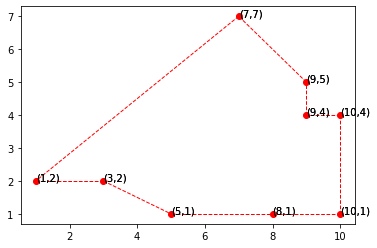

In [283]:

def test_Point ():
    a = [(9,5), (9,4), (10,4), (10,1), (8,1), (5,1), (3,2), (1,2), (7,7)]
    points = []
    for x,y in a:
        p = Point (x,y)
        points += [p]
        p.plot()
    return points
    
points = test_Point()

q = points[-1]
for p in points:
    p.plotline (q)
    q = p

# Expected outputs:

<div>
    <div class="tsp.tour.png">
    <div style="float:left;margin-right:15px;">
        <img src="tsp.tour.png" height="400" width="400"  />
        <p style="text-align:center;"> tsp.tour.png </p>
    </div>

</div>

# Read city locations from a text file 

In [284]:
import re
    
        
def readFromFile (name):
    """read an input file in the following format, and 
        return a list of objects of class Point
        # testcase test_13.txt
        0: (9,5)       
        1: (10,1)
        2: (10,4)
        ...
        8: (1,2)
    """
    print ("open file " + name + " for read.")
    
    # xxx fill in the missing codes
   
    lts = [] # form list type
    rgx = '(\d+): \((\d+),(\d+)\)' # read regex type
    
    with open(name) as file: 
        file_reader = file.read() # Read files 
        
        result = re.findall(rgx, file_reader) # Find all 

        
        for point in result: # For each pattern string
            lts.append(Point(int(point[1]), int(point[2]))) #
            
    return lts # Return lists

In [285]:
# list of the testcases
a = ["test_13.txt", "test_grid_3.txt","test_grid_4.txt","test_48.txt","test_grid_4.2.txt", "test_simple.txt"]

# (5pt) B2:  Test readFromFile

In [286]:
fn = a[0]
points = readFromFile(fn)
print (points) 

open file test_13.txt for read.
[(9,5), (10,1), (10,4), (5,1), (7,7), (3,2), (8,1), (9,4), (1,2)]


### The expected outputs

* open file test_13.txt for read.
* [(9,5), (10,1), (10,4), (5,1), (7,7), (3,2), (8,1), (9,4), (1,2)]

# (5pt) B3:  Test readFromFile

In [287]:
fn = a[1]
points = readFromFile(fn)
print (points) 

open file test_grid_3.txt for read.
[(0,0), (1,0), (2,0), (0,1), (1,1), (2,1), (0,2), (1,2), (2,2)]


### The expected outputs

* open file test_grid_3.txt for read.
* [(0,0), (1,0), (2,0), (0,1), (1,1), (2,1), (0,2), (1,2), (2,2)]

# Define Class Tour

In [298]:
import pandas as pd
import copy

def nearest (p, cities):
    """Find the city from list cities that is the nearest to the current city p
    """
    # xxx fill in the missing codes
    if len(cities) == 0:
        return None
    
    closer = (cities[0], p.dist(cities[0])) # define close city var
    
    
    for city in cities: 
        distance = p.dist(city) # distance between p and this city 
    
        if distance < closer[1]: # If this city is closer in distance
            closer = (city, distance) # Replace old city location with close city
    
    
    return closer[0] # Return the close city

def nearestNeighbor (self):
    """Return TSP tour by Nearest Neighbor heuristics
    """
    # xxx fill in the missing codes
    first = self.city[0]
    self.ans.append(first) ## add first city
    
    cities = copy.deepcopy(self.city[1:]) # Copy list 
        
    for i in range(len(cities)):
        close_ct = nearest(first, cities)
        cities.remove(close_ct)
        
        self.ans.append(close_ct)  ## add first city
        
        first = close_ct
        

def convertPoint2List (points):
    x = [];
    y = [];
    for p in points :
        x.append (p.x)
        y.append (p.y)
    x.append (points[0].x)
    y.append (points[0].y)
    return x,y

# reference: https://matplotlib.org/tutorials/introductory/pyplot.html
def plot(self   ):
    """Plot the tour by matplotlib.pyplot with
        * xlable and ylable displayed
        * title = "TSP by neighbor neighbor length=..." 
        * legend
        * the coordinates for the 1st and 2nd points 
        
        Sample outputs are shown below
    """
    x,y = convertPoint2List(self.ans)

    plt.plot(x,y,  'bo-', label = "tsp" )
    
    self.ans[0].plot("1st")
    self.ans[1].plot("2nd")

    plt.xlabel('x - axis') 
    plt.ylabel('y - axis') 
    d = self.__len__()
    msg = "TSP by neighbor neighbor length={:.2f}".format(d)
    plt.title( msg )   
    plt.legend() 
    plt.show()
    print ("Tour length = %.2f" % d )
    print(self.ans)
        
class Tour:
    """Twp lists of cities, one for initial list, one for the resulting tour
    """
    def __init__ (self, f):
        """Initialized a list of Points from coordinates in a file 
        """
        self.city = readFromFile(f)
        self.ans = []

    def __str__ (self):
        """the string representation
        """
        msg = ""
        for p in self.ans:
            msg += " " + str(p)
        return msg
                    
    def __len__ (self):
        """return the length of TSP tour
        """
        # xxx fill in the missing codes
        # xxx fill in the missing codes
        total_Dist = 0
        
        for j in range (len(self.ans) - 1, 1, 1): 
            
            if(j>=1):
                total_Dist += self.ans[j].dist(self.ans[j-1]) 
                #  distance between two locations.
        
        return total_Dist
   
Tour.plot = plot

Tour.nearestNeighbor = nearestNeighbor

# (5pt) B4: Test class Tour

open file test_13.txt for read.


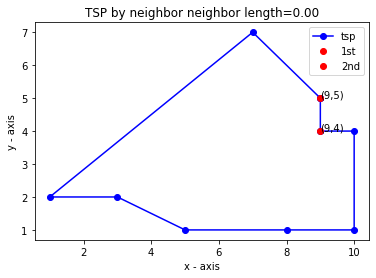

Tour length = 0.00
[(9,5), (9,4), (10,4), (10,1), (8,1), (5,1), (3,2), (1,2), (7,7)]
open file test_48.txt for read.


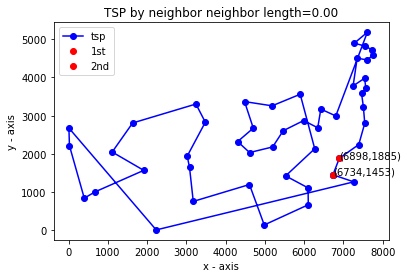

Tour length = 0.00
[(6734,1453), (6898,1885), (7392,2244), (7545,2801), (7509,3239), (7462,3590), (7573,3716), (7541,3981), (7248,3779), (7352,4506), (7608,4458), (7762,4595), (7732,4723), (7555,4819), (7280,4899), (7611,5184), (6807,2993), (6426,3173), (6347,2683), (5989,2873), (5468,2606), (5199,2182), (4612,2035), (4307,2322), (4706,2674), (4483,3369), (5185,3258), (5900,3561), (6271,2135), (5530,1424), (6101,1110), (6107,669), (4985,140), (4608,1198), (3177,756), (3082,1644), (3023,1942), (3484,2829), (3245,3305), (1633,2809), (1112,2049), (1916,1569), (675,1006), (401,841), (23,2216), (10,2676), (2233,10), (7265,1268)]


In [299]:
def test_tsp():
    a = [ "test_13.txt", "test_48.txt"]
    for f in a:
        tsp = Tour (f)
        tsp.nearestNeighbor ()
        tsp.plot()       
test_tsp()    # exptected outputs are shown below

# The exptected outputs 
<div class="tsp.png">
    <div style="float:left;margin-right:15px;">
        <img src="tsp.13.png" height="400" width="400"  />
        <p style="text-align:center;"> tsp.13.png </p>
    </div>

</div>

# The exptected outputs 

<div class="tsp.png">
    <div style="float:left;margin-right:5px;">
        <img src="tsp.48.png" height="550" width="550"  />
        <p style="text-align:center;"> tsp.48.png </p>
    </div>
</div>

# C :  Plot the trend of precipitation and temperature changes

In [300]:
import pandas as pd

# xxx read in all the weather data from the given text file
fn = "weather_Station(station_id='USC00047916', latitude=36.9878, longitude=-121.9994, elevation=21.3, state='CA', name='SANTA CRUZ', start=1893, end=2020).txt" 

with open( fn ) as weather_file:
    weather = weather_file.read()


def parse_line(line):
    """ parses line of weather data
        removes values of -9999 (missing value)
    """
    
    # return None if line is empty
    if not line:
        return None
    
    # split out first 4 fields and string containing temperature values
    record = (line[:11], int(line[11:15]), int(line[15:17]), line[17:21])
    temperature_string = line[21:]
    
    # raise exception if the temperature string is too short
    if len(temperature_string) < 248:
        raise ValueError("String not long enough - {} {}".format(temperature_string, str(line)))
        
    # use a list comprehension on the temperature_string to extract and convert the 
    values = [float(temperature_string[i:i + 5])/10 for i in range(0, 248, 8)
              if not temperature_string[i:i + 5].startswith("-9999")]
    
    # get the number of values, the max and min, and calculate average
    count = len(values)
    tmax = round(max(values), 1)
    tmin = round(min(values), 1)
    mean = round(sum(values)/count, 1)

    # add the temperature summary values to the record fields extracted earlier and return
    return record + (tmax, tmin, mean, count)

# process all weather data
# list comprehension, will not parse empty lines

# xxx fill in the missing codes below
# xxx partial solution is given below

# weather is readed file
#split the data for each line
weather_data = [parse_line(x) for x in weather.split("\n") if x]

# classify datas in 3 types using 'for'
#and collect datas for  'TMAX'  'TMIN'  'PRCP'
tmax_data = [x for x in weather_data if x[3] == 'TMAX']
tmin_data = [x for x in weather_data if x[3] == 'TMIN']
prcp_data = [x for x in weather_data if x[3] == 'PRCP']

import pandas as pd

a = ['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days']

tmax_df = pd.DataFrame(tmax_data, columns=a)
tmin_df = pd.DataFrame(tmin_data, columns=a)
prcp_df = pd.DataFrame(prcp_data, columns=a)

# Group data by year, and choose the Mean columns only, take their average (mean)  and  display the line plot as shown
a = ['Year', 'Mean']



# (5pt) C1: The expected plot of the average precipitation change over years

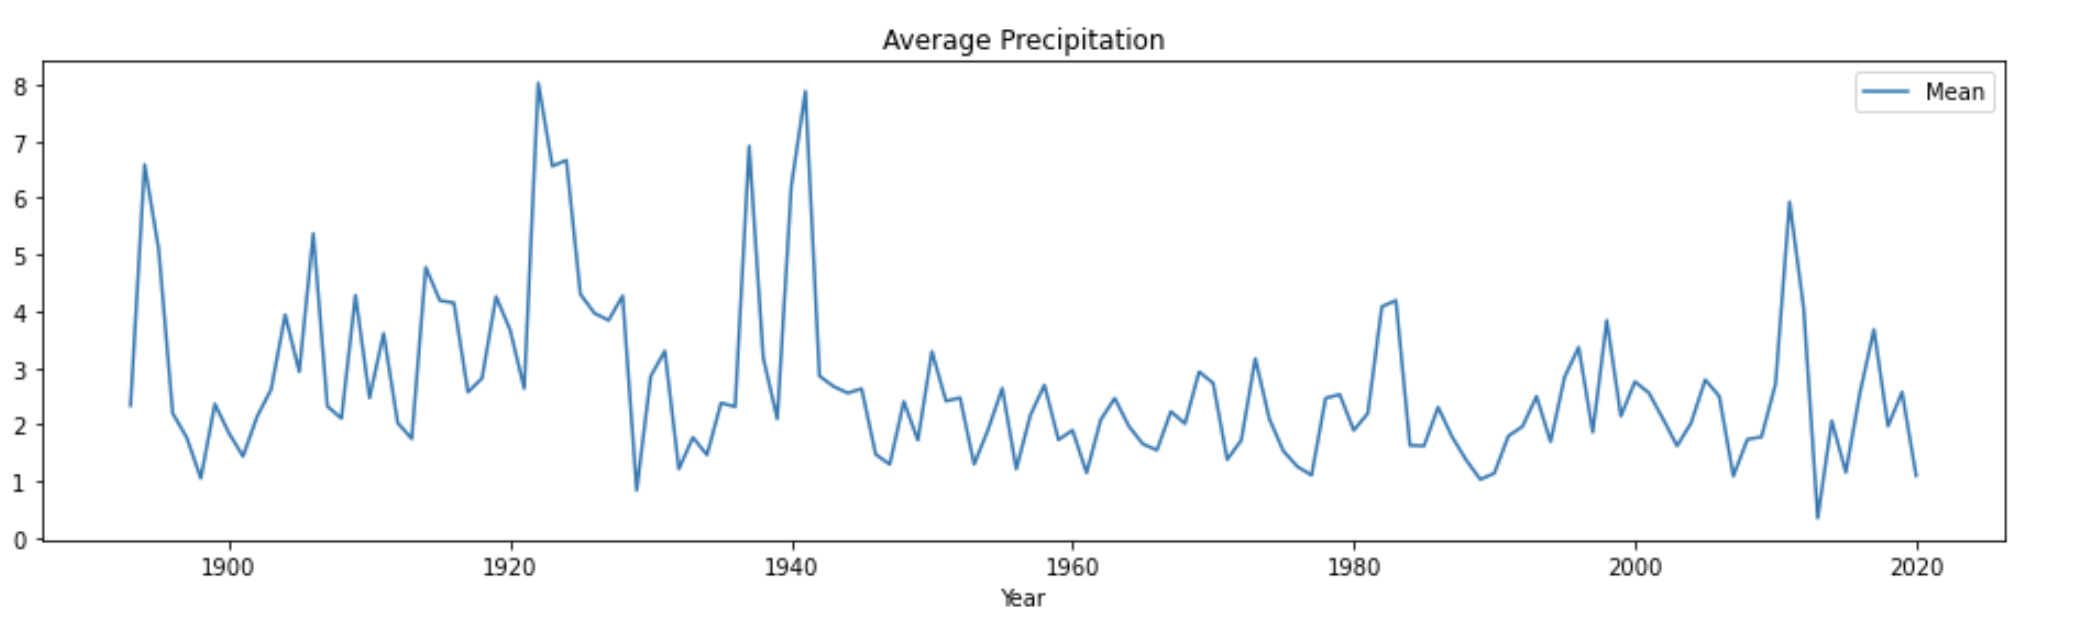

In [301]:
from IPython.display import Image
Image(filename='mean.prep.png')

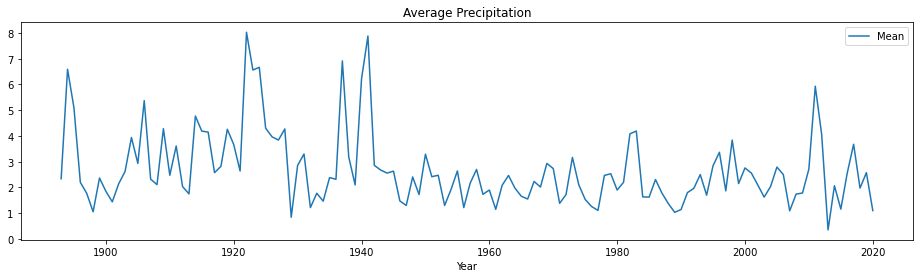

In [302]:
prcp_df[a].groupby('Year').mean().plot(title = 'Average Precipitation', kind='line', figsize=(16, 4))

# (5pt) C2: The expected plot of average Highest Temparature change over years

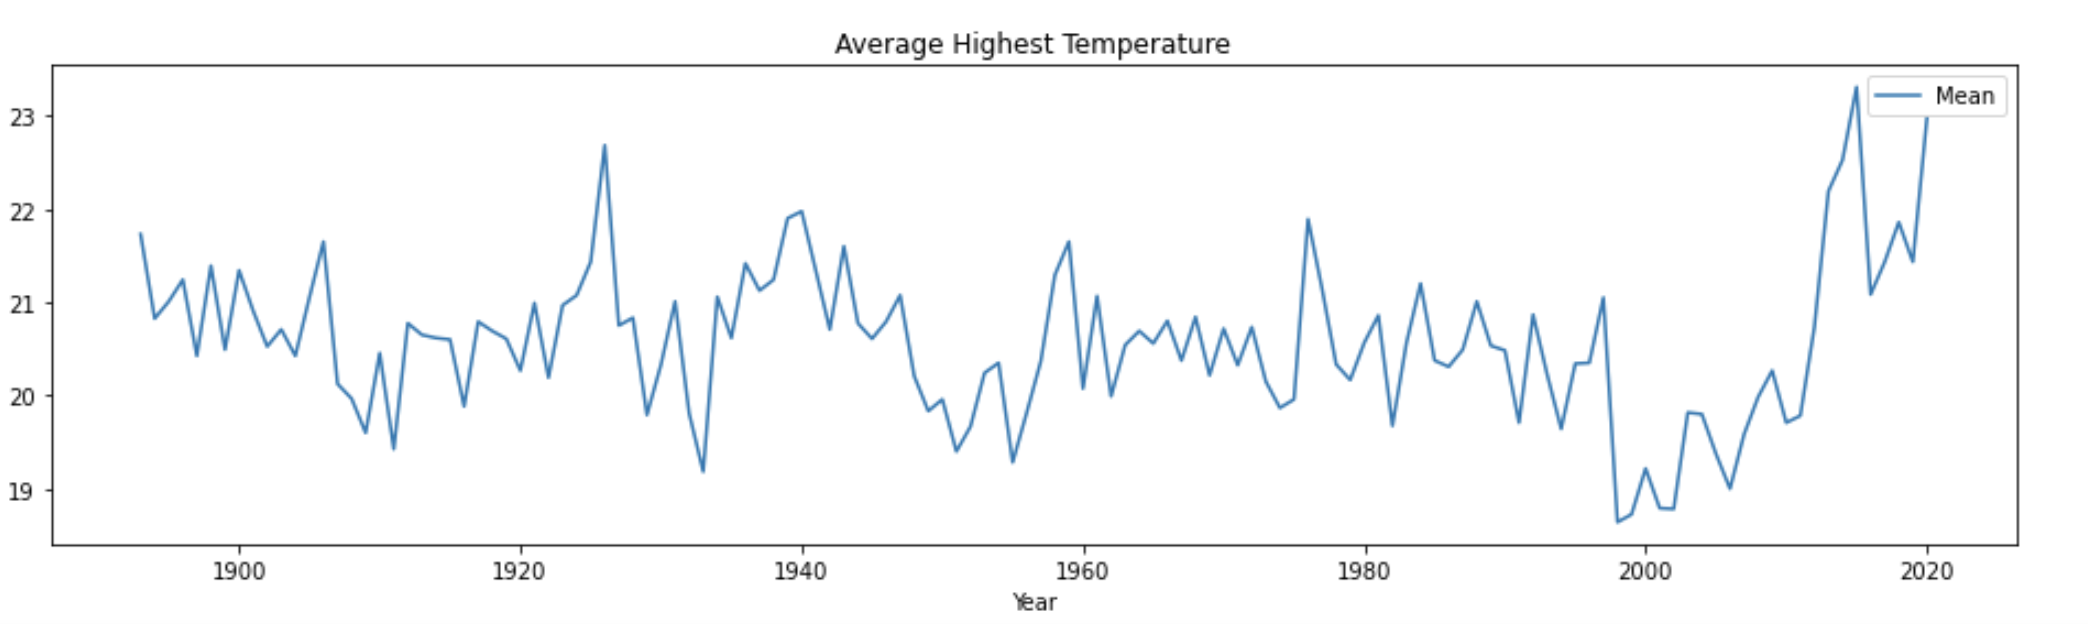

In [303]:
Image(filename='mean.tmax.png')

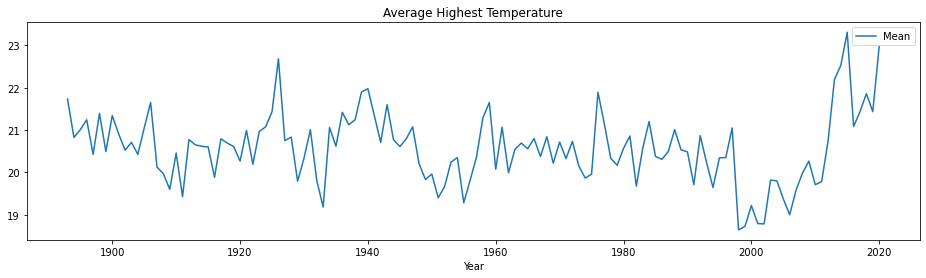

In [304]:
tmax_df[a].groupby('Year').mean().plot(title='Average Highest Temperature', kind='line', figsize=(16, 4))

# (5pt) C3: The expected plot of average Lowest Temparature change over years

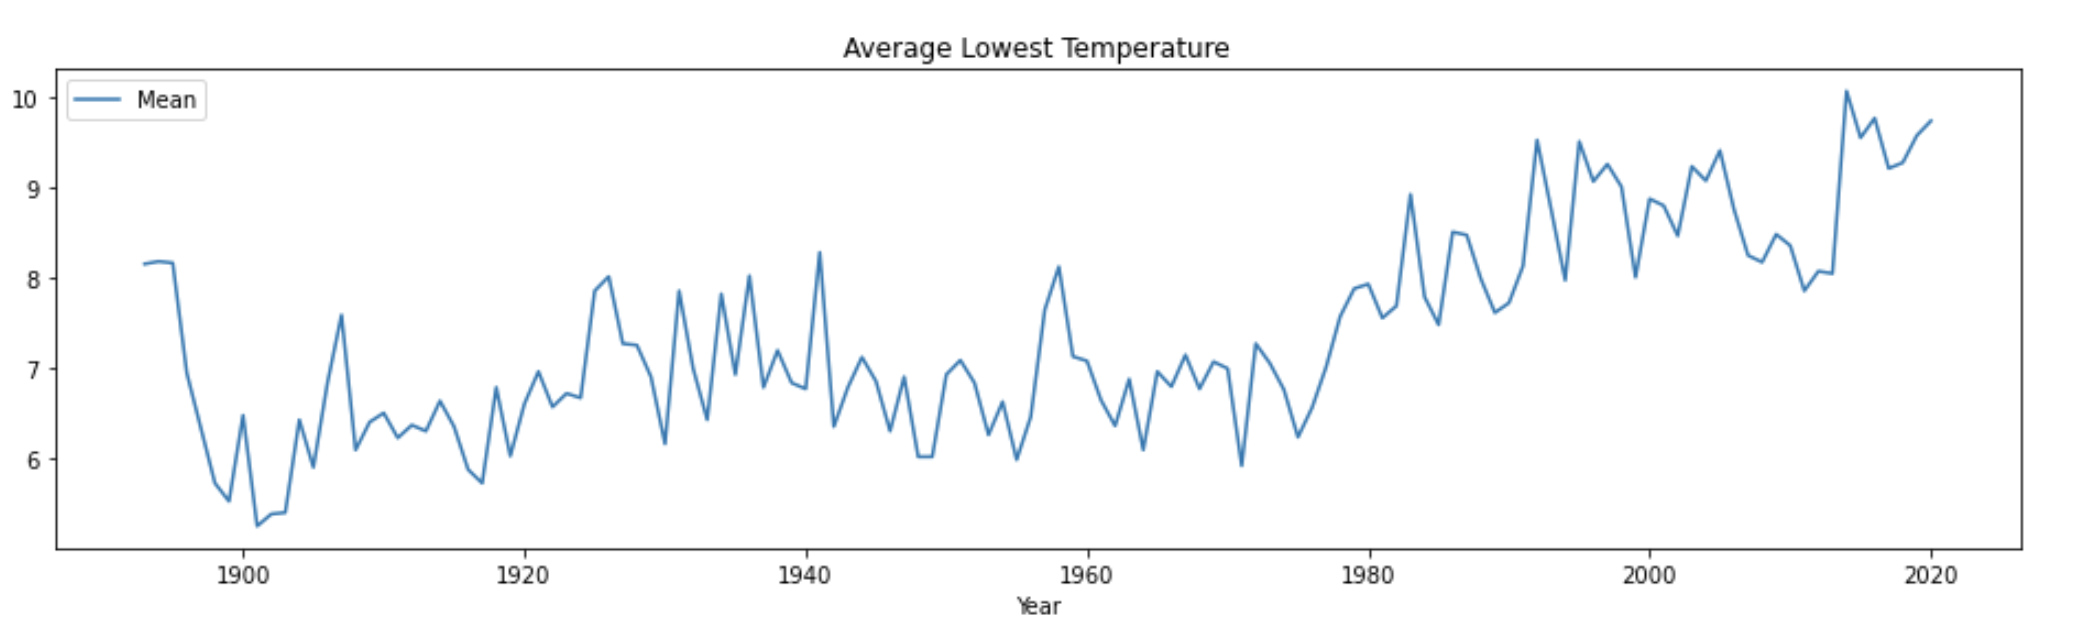

In [305]:
Image(filename='mean.tmin.png')

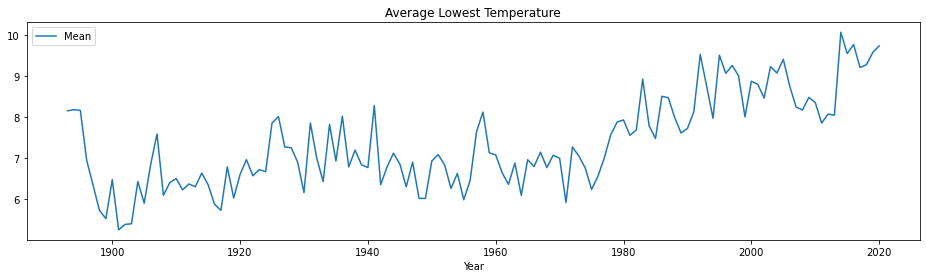

In [306]:
tmin_df[a].groupby('Year').mean().plot(title='Average Lowest Temperature', kind='line', figsize=(16, 4))

# D:  Pandas DataFrame

# (5pt)    D.1

* In the code snippet below, add the codes to 
    * append a new row 'k' to DataFrame with all values set to None 
    * append a new column 'column' to DataFrame with all values set to None 

In [307]:
import pandas as pd
import numpy as np
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)

# xxx 1. add a single statement to add new row 'k'  with all values set to None
# xxx fill in the missing codes.

# shape[1] is 2nd colummn and attempts is none
df.loc['k'] = [None]*df.shape[1]

# xxx 2. add a single statement to delete column "score"
# xxx fill in the missing codes.
del df['score']

# deleete 'score'

# xxx 3. add a single statement to add new column 'color' with all values set to None
# xxx fill in the missing codes.
df['color'] = [None]*df.shape[0]

# shape[0] is 1st colummn and name is none

print("New DataFrame after inserting row 'k' and column 'color' ")
print(df)


New DataFrame after inserting row 'k' and column 'color' 
        name attempts qualify color
a  Anastasia        1     yes  None
b       Dima        3      no  None
c  Katherine        2     yes  None
d      James        3      no  None
e      Emily        2      no  None
f    Michael        3     yes  None
g    Matthew        1     yes  None
h      Laura        1      no  None
i      Kevin        2      no  None
j      Jonas        1     yes  None
k       None     None    None  None


# (5pt)   D.2

* In the code snippet below, add the codes to 
    * replace all th Nan numbers with 0
    * double the numbers in column 'score' 
    * Then, square the numbers in column 'score'

In [308]:
import pandas as pd
import numpy as np
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)

# xxx fill in the missing codes 
df['score'] = (2 * df['score'].fillna(0)) ** 2

df



,name,score,attempts,qualify
a,Anastasia,625.0,1,yes
b,Dima,324.0,3,no
c,Katherine,1089.0,2,yes
d,James,0.0,3,no
e,Emily,324.0,2,no
f,Michael,1600.0,3,yes
g,Matthew,841.0,1,yes
h,Laura,0.0,1,no
i,Kevin,256.0,2,no
j,Jonas,1444.0,1,yes


# The exptected outputs 

<div class="tsp.png">
    <div style="float:left;margin-right:5px;">
        <img src="dataframe.png" height="250" width="250"  />
        <p style="text-align:center;"> dataframe.png </p>
    </div>
</div>


# (4pt)  D.3

* In the code snippet below, add the codes to 
    * print out the row with the highest score
    * print out the row with the lowest score
 

In [309]:
import pandas as pd
import numpy as np
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)

# xxx fill in missing codes here
# a = ... 
# b = ...
print ("The row with the highest score: ")
#  df['score'].argmax() is the index number for maximum
a = df.iloc[[df['score'].argmax()]] 
print (a)



print ("\nThe row with the lowest score: ")
#  df['score'].argmin() is the index number for minimum
b = df.iloc[[df['score'].argmin()]] 
print (b)


The row with the highest score: 
      name  score  attempts qualify
f  Michael   20.0         3     yes

The row with the lowest score: 
    name  score  attempts qualify
i  Kevin    8.0         2      no


# (1pt) D.4

* In the code snippet below, add the codes to 
    * convert dataframe df back to a 2-dimensional list 

In [310]:
# xxx you can only add codes where marked xxx
# xxx you cannot delete or alter any portions of the given code snippet
a = {'Product': ['Tablet', 'iPhone', 'Laptop', 'Monitor'], 'Price': [250, 800, 1200, 300]}
df = pd.DataFrame(a)

b = {}
for k in df.columns:
    # xxx fill in missing codes (in one statement)
    b[k] = df[k].to_list()
    # assign lists in column to an empty dictionary.
    
print (a==b)

True


# Expected output

True